# Rossmann Sales Analysis - Project 1

### By team 11: Jaganath Sairam and William Senay

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotnine as pn

## Data reading and initial cleansing

In [17]:
df_train = pd.read_csv('Data/train.csv')
df_store = pd.read_csv('Data/store.csv')

C:\Users\wills\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Datasets found on Kaggle at https://www.kaggle.com/c/rossmann-store-sales

In [49]:
df_train.count()

Store            1017209
DayOfWeek        1017209
Date             1017209
Sales            1017209
Customers        1017209
Open             1017209
Promo            1017209
StateHoliday     1017209
SchoolHoliday    1017209
dtype: int64

In [50]:
df_train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

There are no missing rows in the train dataset and the datatypes look correct.

In [51]:
df_store.count()

Store                        1115
StoreType                    1115
Assortment                   1115
CompetitionDistance          1112
CompetitionOpenSinceMonth     761
CompetitionOpenSinceYear      761
Promo2                       1115
Promo2SinceWeek               571
Promo2SinceYear               571
PromoInterval                 571
dtype: int64

In [52]:
df_store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

Now that the data is clean, let's look at the first five rows of the data:

In [53]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [54]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


This concludes the cleaning section. We now have ready to use for analysis datasets.

## Initial Exploration: Finding Relationships and Points of Interest

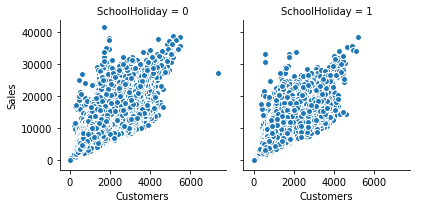

In [7]:
school_holiday_chart = sns.FacetGrid(df, col="SchoolHoliday", margin_titles=True)
school_holiday_chart.map(plt.scatter, "Customers", "Sales", edgecolor="w").add_legend()

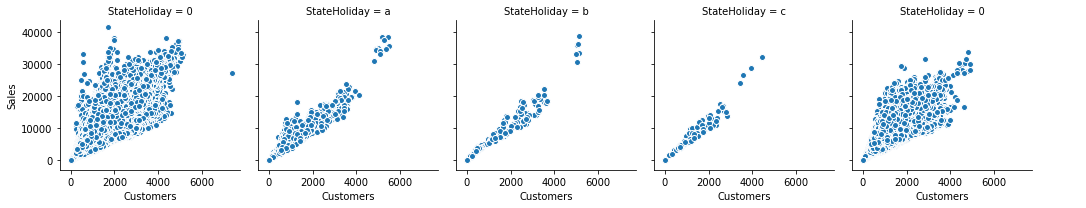

In [8]:
state_holiday_chart = sns.FacetGrid(df, col="StateHoliday", margin_titles=True)
state_holiday_chart.map(plt.scatter, "Customers", "Sales", edgecolor="w").add_legend()

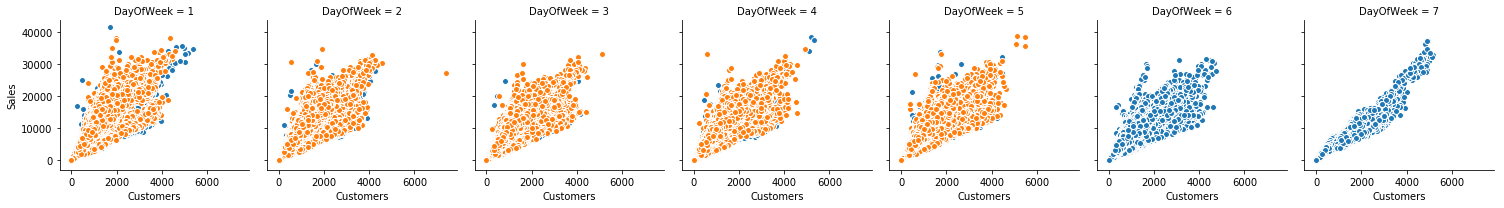

In [9]:
day_of_week_chart = sns.FacetGrid(df, col='DayOfWeek', hue='Promo')
day_of_week_chart.map(plt.scatter, 'Customers', 'Sales', edgecolor='w')

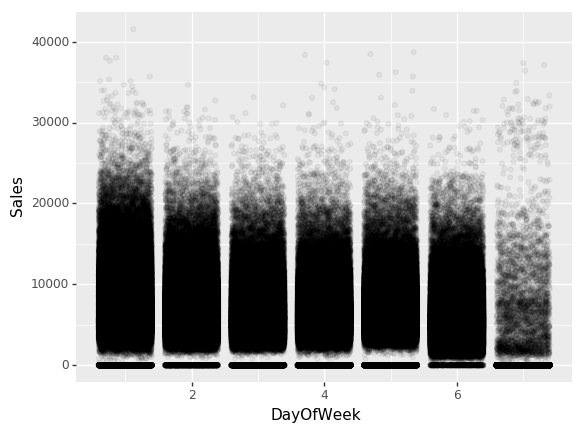

<ggplot: (146885118952)>

In [12]:
pn.ggplot(pn.aes(x='DayOfWeek', y='Sales'), df) + pn.geom_jitter(alpha=0.05)